# Importing lib ,data and some basic calcultaion


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
import  os
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('/Users/Atharva/Desktop/Algo tradin/sentiment_data.csv')

In [3]:
df

,date,symbol,twitterPosts,twitterComments,twitterLikes,twitterImpressions,twitterSentiment
0,2021-11-18,AAPL,811.0,2592.0,21674.0,7981808.0,NaN
1,2021-11-18,ABT,21.0,3.0,13.0,64089.0,NaN
2,2021-11-18,AMD,150.0,675.0,2949.0,1645270.0,NaN
3,2021-11-18,AMZN,557.0,1315.0,12969.0,5590695.0,NaN
4,2021-11-18,ATVI,82.0,36.0,131.0,1310715.0,NaN
...,...,...,...,...,...,...,...
27230,2023-01-04,TMO,21.0,2.0,32.0,30857.0,0.610020
27231,2023-01-04,TSLA,6767.0,540711.0,3810688.0,55464921.0,0.543057
27232,2023-01-04,TSN,35.0,168.0,460.0,57207.0,0.561900
27233,2023-01-04,V,132.0,1008.0,5943.0,139835.0,0.567286


In [4]:
df['date']= pd.to_datetime(df['date'])

In [9]:
df=df.set_index(['date','symbol'])

In [10]:
df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  
date       symbol                                        
2021-11-18 AAPL             7981808.0               NaN  
           ABT                64089.0               NaN  
           AMD              1645270.0               NaN  
           AMZN             5590695.0               NaN  
           ATVI             1310715.0               NaN  
...                               ...               ...  
2023-01-04 TMO                30857.0          0.610020  
           TSLA            55464921.0          0.543057  
           TSN                57207.0          0.561900  
           V                 139835.0          0.567286  
           XOM               483389.0          0.588914  

[27235 rows x 5 columns]

In [13]:
 """Now we want to get the actual engagement of the people in the twitter post becaxuse there are lot of 
    bot in the twitter making the data very messy and inaccurate.
    so to do that we are going to take the ratio of twitter comment / twitter likes.
    this will show us the if acutally people are engaged or not."""
    

'now we want to get the actual engagement of the people in the twitter post becaxuse there are lot of \n   bot in the twitter making the data very messy and inaccurate.\n   so to do that we are going to take the ratio of twitter comment / twitter likes.\n   this will show us the if acutally people are engaged or not.'

In [14]:
df['eng_ratio']=df['twitterComments']/df['twitterLikes']

In [15]:
df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  eng_ratio  
date       symbol                                                   
2021-11-18 AAPL             7981808.0               NaN   0.119590  
           ABT                64089.0               NaN   0.230769  
           AMD              1645270.0               NaN   0.228891  
           AMZN             5590695.0               NaN   0.101396  
           ATVI             1310715.0               NaN   0.274809  
...                               ...               ...        ...  
2023-01-04 TMO                30857.0          0.610020   0.062500  
           TSLA            55464921.0          0.543057   0.141893  
           TSN                57207.0          0.561900   0.365217  
           V                 139835.0          0.567286   0.169611  
           XOM               483389.0          0.588914   0.180589  

[27235 rows x 6 columns]

In [16]:
# Now we will keep only data which have more than 20 likes and more than 10 comments
df=df[(df['twitterLikes']>20)&(df['twitterComments']>10)]

In [17]:
df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
           BA              61.0             55.0         342.0   
...                         ...              ...           ...   
2023-01-04 T              184.0           3409.0       14271.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  eng_ratio  
date       symbol                                                   
2021-11-18 AAPL             7981808.0               NaN   0.119590  
           AMD              1645270.0               NaN   0.228891  
           AMZN             5590695.0               NaN   0.101396  
           ATVI             1310715.0               NaN   0.274809  
           BA                425847.0               NaN   0.160819  
...                               ...               ...        ...  
2023-01-04 T                 884935.0          0.590457   0.238876  
           TSLA            55464921.0          0.543057   0.141893  
           TSN                57207.0          0.561900   0.365217  
           V                 139835.0          0.567286   0.169611  
           XOM               483389.0          0.588914   0.180589  

[25375 rows x 6 columns]

# Aggreated Monthly  and calcultate average sentiment  of the month
    . We are going to select the top five stock and invested in them

In [35]:
# To calculate the average eng_ratio for every month
aggre_df=pd.DataFrame(df.reset_index('symbol').groupby([pd.Grouper(freq='M'),'symbol'])['eng_ratio'].mean())

In [39]:
# To rank the eng_ratio for each month 
aggre_df['rank']=(aggre_df.groupby(level=0)['eng_ratio'].transform(lambda x: x.rank(ascending=False)))

In [40]:
aggre_df

eng_ratio  rank
date       symbol                 
2021-11-30 AAL      0.203835  37.0
           AAPL     0.256318  23.0
           ABBV     0.244677  26.0
           ABT      0.313368  14.0
           AES      0.864613   2.0
...                      ...   ...
2023-01-31 TMO      0.333313  19.0
           TSLA     0.151992  72.0
           TSN      0.280553  30.0
           V        0.194045  60.0
           XOM      0.217904  53.0

[1109 rows x 2 columns]

# 3) we have to select the top 5 stock which have most (twitter_comment/twitter_like) i.e. eng_ratio 

In [46]:
# to get the top 5 rank stock 
filt_df=aggre_df[aggre_df['rank']<6]

In [52]:
filt_df

eng_ratio  rank
date       symbol                 
2021-11-30 AES      0.864613   2.0
           FCX      0.626323   5.0
           MNST     0.699721   3.0
           OXY      2.147741   1.0
           SLB      0.647374   4.0
...                      ...   ...
2023-01-31 A        0.471572   5.0
           AES      0.533809   4.0
           BIIB     0.839303   1.0
           FCX      0.667387   3.0
           MDT      0.806841   2.0

[75 rows x 2 columns]

In [54]:
# to change the to the beignning of the next month
filt_df=filt_df.reset_index(level=1)
filt_df.index=filt_df.index+pd.DateOffset(1)

In [55]:
  filt_df

,symbol,eng_ratio,rank
date,,,
2021-12-01,AES,0.864613,2.0
2021-12-01,FCX,0.626323,5.0
2021-12-01,MNST,0.699721,3.0
2021-12-01,OXY,2.147741,1.0
2021-12-01,SLB,0.647374,4.0
...,...,...,...
2023-02-01,A,0.471572,5.0
2023-02-01,AES,0.533809,4.0
2023-02-01,BIIB,0.839303,1.0


In [56]:
filt_df=filt_df.reset_index().set_index(['date','symbol'])

In [57]:
filt_df

eng_ratio  rank
date       symbol                 
2021-12-01 AES      0.864613   2.0
           FCX      0.626323   5.0
           MNST     0.699721   3.0
           OXY      2.147741   1.0
           SLB      0.647374   4.0
...                      ...   ...
2023-02-01 A        0.471572   5.0
           AES      0.533809   4.0
           BIIB     0.839303   1.0
           FCX      0.667387   3.0
           MDT      0.806841   2.0

[75 rows x 2 columns]

In [58]:
filt_df.head(20)

eng_ratio  rank
date       symbol                 
2021-12-01 AES      0.864613   2.0
           FCX      0.626323   5.0
           MNST     0.699721   3.0
           OXY      2.147741   1.0
           SLB      0.647374   4.0
2022-01-01 D        0.801994   5.0
           FCX      0.841220   4.0
           L        6.507246   1.0
           LUV      1.303215   2.0
           MA       0.883401   3.0
2022-02-01 AMD      0.715556   4.0
           D        1.136678   1.0
           FCX      0.655237   5.0
           LUV      1.035258   2.0
           MA       0.729063   3.0
2022-03-01 FCX      1.138332   2.0
           GILD     0.530886   5.0
           LUV      1.574377   1.0
           MRO      0.581748   4.0
           OXY      1.025579   3.0

# 4) Extract the stock to form a portfolio for each new month 

In [66]:
dates= filt_df.index.get_level_values('date').unique().tolist()

fixed_date={}

for d in dates:
    fixed_date[d.strftime('%Y-%m-%d')]=filt_df.xs(d,level=0).index.tolist()
fixed_date    

{'2021-12-01': ['AES', 'FCX', 'MNST', 'OXY', 'SLB'],
 '2022-01-01': ['D', 'FCX', 'L', 'LUV', 'MA'],
 '2022-02-01': ['AMD', 'D', 'FCX', 'LUV', 'MA'],
 '2022-03-01': ['FCX', 'GILD', 'LUV', 'MRO', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'J', 'KEY'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CB', 'CRM', 'DD', 'FCX', 'STZ'],
 '2022-08-01': ['A', 'DD', 'JPM', 'REGN', 'STZ'],
 '2022-09-01': ['ABT', 'DIS', 'L', 'META', 'MRNA'],
 '2022-10-01': ['J', 'KEY', 'L', 'META', 'MU'],
 '2022-11-01': ['A', 'DD', 'FCX', 'J', 'META'],
 '2022-12-01': ['AEP', 'AES', 'DD', 'J', 'STZ'],
 '2023-01-01': ['A', 'AES', 'DAL', 'J', 'KEY'],
 '2023-02-01': ['A', 'AES', 'BIIB', 'FCX', 'MDT']}

# 5) to Download the fresh stock  for those stocks

In [79]:
stk_list=df.index.get_level_values(level=1).unique().tolist()
print(len(stk_list))


85


In [78]:
prices_df=yf.download(stk_list,start='2021-01-01',end='2023-03-01')

[*********************100%%**********************]  85 of 85 completed


# 6) Calculating  portfolio return with monthly rebalancing

In [85]:
return_df=np.log(prices_df['Adj Close']).diff().dropna()

In [86]:
return_df

,A,AAL,AAP,AAPL,ABBV,ABT,AEP,AES,ALB,AMD,...,RCL,REGN,SLB,STZ,T,TMO,TSLA,TSN,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.008143,0.019634,-0.001081,0.012288,0.010287,0.012297,-0.001350,0.033012,0.065304,0.005079,...,0.025548,0.001221,0.052363,0.000692,-0.006133,0.012427,0.007291,-0.000788,-0.015037,0.047068
2021-01-06,0.027053,0.005816,0.056165,-0.034241,-0.008676,-0.002084,0.007951,0.039189,0.072036,-0.026654,...,-0.004836,-0.028024,0.053862,0.031005,0.019293,0.015557,0.027995,0.029658,-0.008850,0.025197
2021-01-07,0.026261,-0.009062,0.008505,0.033554,0.010646,0.009660,-0.027044,-0.010058,0.049579,0.052090,...,0.024355,0.023359,0.019071,0.022759,0.002678,0.030686,0.076448,-0.011541,0.005581,0.007815
2021-01-08,0.007108,-0.016388,0.014153,0.008594,0.005234,0.002782,-0.008927,0.027519,0.000544,-0.006114,...,-0.013746,0.035782,-0.001609,0.005838,-0.006920,0.023642,0.075481,-0.009018,0.007641,0.011060
2021-01-11,0.008542,-0.008629,0.005629,-0.023523,0.016182,-0.006923,-0.005064,0.001572,-0.037693,0.027839,...,-0.011717,0.008366,0.006021,-0.014571,-0.005182,0.002047,-0.081442,0.011491,-0.011953,0.029904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,-0.009387,-0.008320,-0.003961,0.002892,-0.008789,-0.009305,-0.000330,-0.007064,0.018387,-0.002086,...,-0.003490,0.002088,-0.018713,-0.004447,0.008811,-0.004312,0.017528,0.016659,-0.002723,-0.013038
2023-02-23,0.007852,0.019727,-0.011274,0.003285,0.009249,-0.001364,-0.001212,0.000000,0.029584,0.040169,...,0.002793,0.015361,0.017214,0.015546,-0.001549,0.004639,0.006006,0.009992,0.005032,0.009162
2023-02-24,-0.014065,-0.019727,-0.022503,-0.018169,0.004200,-0.020591,-0.003092,-0.002761,-0.017205,-0.021035,...,-0.021709,-0.003521,0.011190,-0.006716,-0.005701,-0.014922,-0.026020,-0.018287,-0.007171,0.000090


In [107]:
portfolio=pd.DataFrame()

for start_date in fixed_date.keys():
    end_date=(pd.to_datetime(start_date)+pd.offsets.MonthEnd()).strftime('%Y-%m-%d')
    cols=fixed_date[start_date]
    temp_df=return_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')
    portfolio=pd.concat([portfolio,temp_df],axis=0)
portfolio    
    

,portfolio_return
Date,
2021-12-01,-0.016417
2021-12-02,0.024872
2021-12-03,-0.007711
2021-12-06,0.023926
2021-12-07,0.030547
...,...
2023-02-22,-0.007870
2023-02-23,-0.007323
2023-02-24,-0.009463


# 7) Downling NASDAQ/QQQ prices and calculate the return to compare 

In [100]:
qqq=yf.download(tickers='QQQ',start='2021-01-01',end='2023-03-01')

[*********************100%%**********************]  1 of 1 completed


In [105]:
qqq_ret=np.log(qqq['Adj Close']).diff().to_frame('nasdaq_return')


In [108]:
portfolio=portfolio.merge(qqq_ret,
                          left_index=True,
                          right_index=True) 
portfolio                          

,portfolio_return,nasdaq_return
Date,,
2021-12-01,-0.016417,-0.017159
2021-12-02,0.024872,0.007181
2021-12-03,-0.007711,-0.017541
2021-12-06,0.023926,0.007981
2021-12-07,0.030547,0.029669
...,...,...
2023-02-22,-0.007870,0.000748
2023-02-23,-0.007323,0.008696
2023-02-24,-0.009463,-0.016886


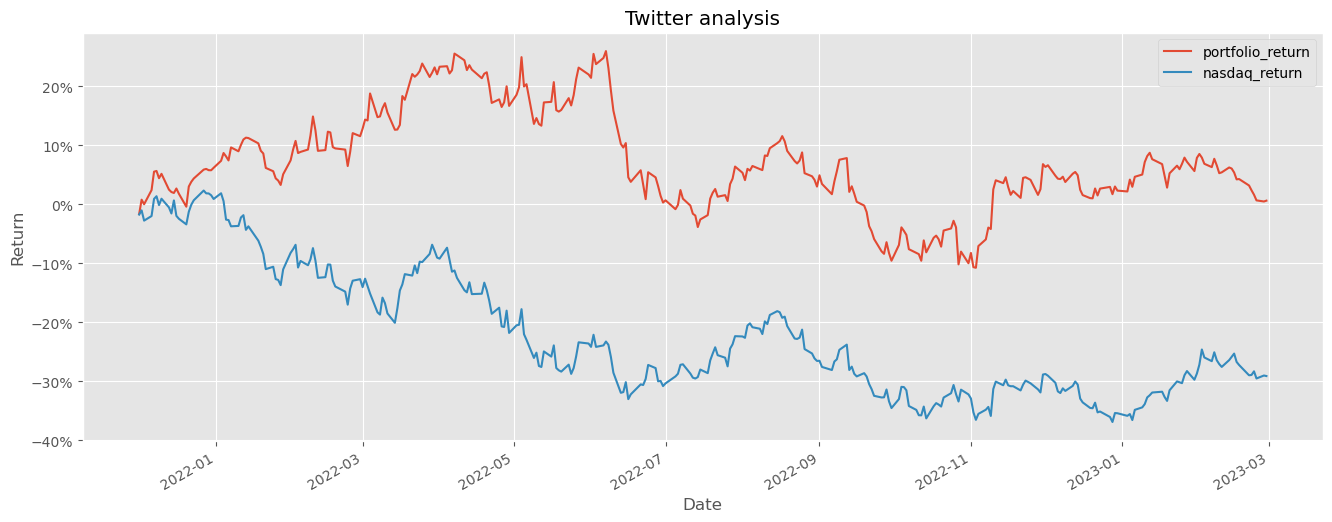

In [116]:
# Visualizing 
import matplotlib.ticker as mtick
portfolio_vis=np.exp(np.log1p(portfolio).cumsum()).sub(1)

portfolio_vis.plot(figsize=(16,6))

plt.title('Twitter analysis')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()